### Gráficos para análise do desempenho da MLP

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
df = pd.read_csv("csvs/grid_search_results.csv")

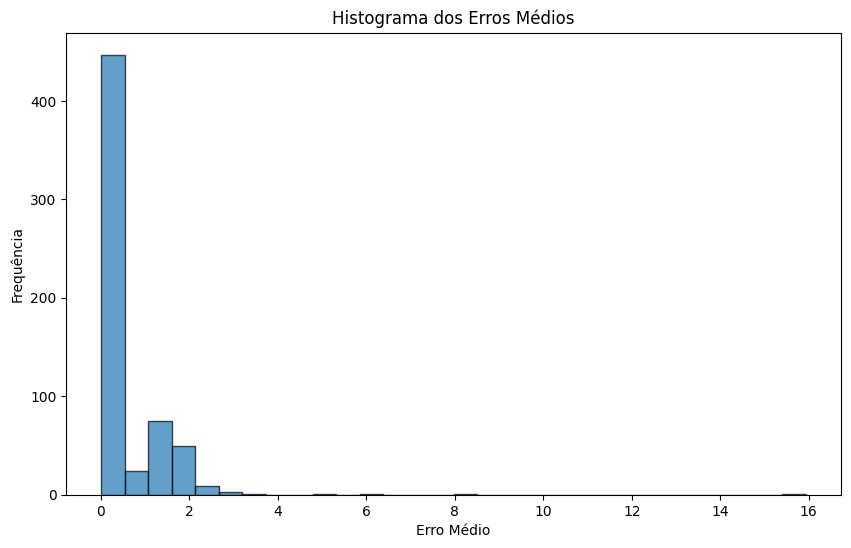

In [67]:
# Calcular os erros
errors = df['Erro médio']

# Plotar o histograma dos erros
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histograma dos Erros Médios')
plt.xlabel('Erro Médio')
plt.ylabel('Frequência')
plt.show()

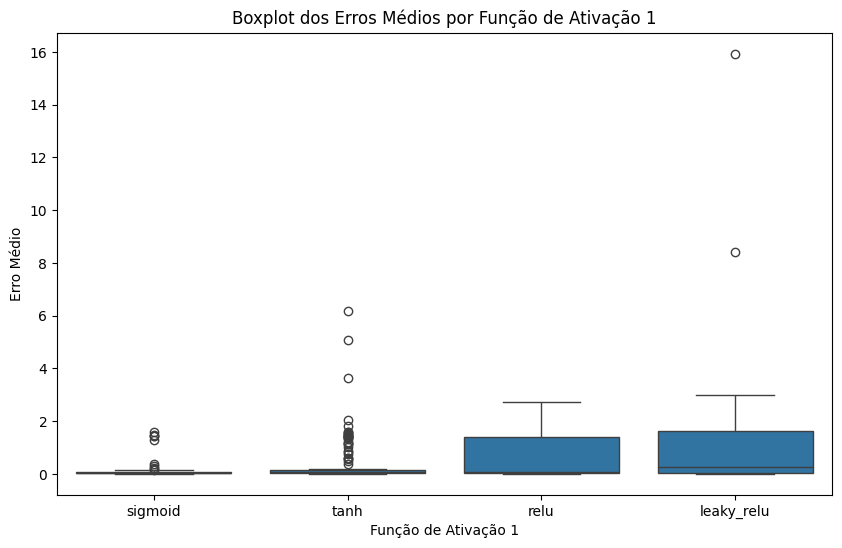

In [68]:
# Plotar boxplot dos erros
plt.figure(figsize=(10, 6))
sns.boxplot(x='Função de ativação 1', y='Erro médio', data=df)
plt.title('Boxplot dos Erros Médios por Função de Ativação 1')
plt.xlabel('Função de Ativação 1')
plt.ylabel('Erro Médio')
plt.show()

#### Heatmap
Utilizado para identificar a melhor combinação de hiperparâmetros que maximiza a acurácia do modelo.
- As regiões do heatmap com maior acurácia destacam as melhores configurações onde a combinação de hiperparâmetros maximizou a acurácia do modelo

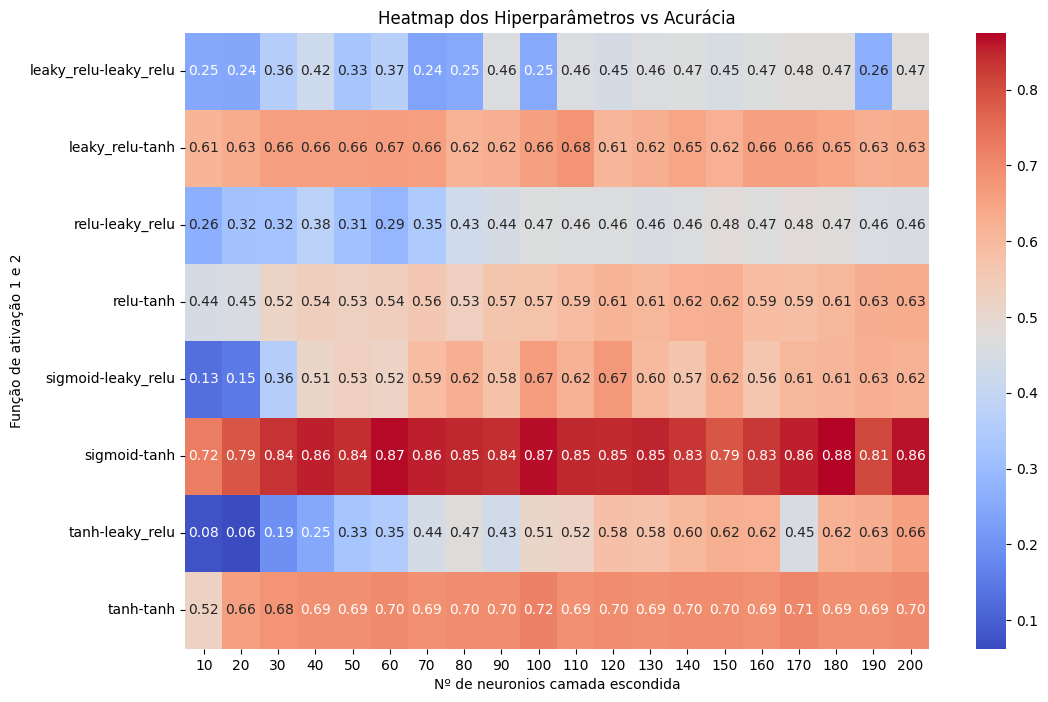

In [69]:
# Pivotar os dados para criar um heatmap
heatmap_data = df.pivot_table(values='Acurácia', 
                              index=['Função de ativação 1', 'Função de ativação 2'], 
                              columns='Nº de neuronios camada escondida')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap dos Hiperparâmetros vs Acurácia')
plt.xlabel('Nº de neuronios camada escondida')
plt.ylabel('Função de ativação 1 e 2')
plt.show()


#### Curvas de Aprendizado 
As curvas de aprendizado mostram como os erros de treinamento e validação evoluem ao longo das épocas.
- Sobreajuste: Se o erro de treinamento é muito baixo enquanto o erro de validação é alto e crescente, o modelo está memorizando o conjunto de treinamento e não generaliza bem para novos dados.
- Subajuste: Se tanto o erro de treinamento quanto o de validação são altos, o modelo não está aprendendo adequadamente a partir dos dados de treinamento.

In [ ]:
df_sigmoid = df[df['Função de ativação 1'] == 'sigmoid']
df_sigmoid_tanh = df_sigmoid[df_sigmoid['Função de ativação 2'] == 'tanh']

# Impacto do Número de Neurônios na Acurácia (Sigmoid-Tanh)
plt.figure(figsize=(10, 6))
sns.barplot(x='Nº de neuronios camada escondida', y='Acurácia', data=df_sigmoid_tanh)
plt.title('Impacto do Número de Neurônios na Acurácia (Sigmoid-Tanh)')
plt.xlabel('Nº de Neurônios na Camada Escondida')
plt.ylabel('Acurácia')
plt.show()


In [ ]:
# Gráfico de Importância dos Hiperparâmetros (Sensibilidade)
import seaborn as sns
import matplotlib.pyplot as plt

# Analisando a importância do número de neurônios na camada escondida
plt.figure(figsize=(10, 6))
sns.barplot(x='Nº de neuronios camada escondida', y='Acurácia', data=df)
plt.title('Impacto do Número de Neurônios na Acurácia')
plt.xlabel('Nº de Neurônios na Camada Escondida')
plt.ylabel('Acurácia')
plt.show()

# Analisando a importância da taxa de aprendizado
plt.figure(figsize=(10, 6))
sns.barplot(x='Taxa de aprendizado', y='Acurácia', data=df)
plt.title('Impacto da Taxa de Aprendizado na Acurácia')
plt.xlabel('Taxa de Aprendizado')
plt.ylabel('Acurácia')
plt.show()


#### Gráficos de comparação da taxa de aprendizado com a acurácia e o erro médio da rede neural.

O gráfico mostra como a acurácia varia com a taxa de aprendizado. A taxa de aprendizado ideal maximiza a acurácia. Se a taxa de aprendizado for muito baixa, o modelo pode aprender muito lentamente e ficar preso em mínimos locais. Se for muito alta, o modelo pode se tornar instável e não convergir adequadamente.

 Além disso, ele ajuda a identificar a taxa de aprendizado que minimiza o erro médio. Idealmente, queremos uma taxa de aprendizado que resulte em um erro médio baixo, indicando que o modelo está fazendo previsões precisas.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("csvs/grid_search_results.csv")
#Plotting the accuracy vs learning rate
plt.figure(figsize=(12, 6))

#Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(data['Taxa de aprendizado'], data['Acurácia'], marker='o', linestyle='-', color='b')
plt.title('Acurácia vs. Taxa de Aprendizado')
plt.xlabel('Taxa de Aprendizado')
plt.ylabel('Acurácia')
plt.grid(True)

#Plot Mean Error
plt.subplot(1, 2, 2)
plt.plot(data['Taxa de aprendizado'], data['Erro médio'], marker='o', linestyle='-', color='r')
plt.title('Erro Médio vs. Taxa de Aprendizado')
plt.xlabel('Taxa de Aprendizado')
plt.ylabel('Erro Médio')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotar a acurácia em relação à taxa de aprendizado
plt.figure(figsize=(10, 6))
sns.lineplot(x='Taxa de aprendizado', y='Acurácia', data=df_sigmoid_tanh, marker='o')
plt.title('Acurácia vs. Taxa de Aprendizado (Sigmoid-Tanh)')
plt.xlabel('Taxa de Aprendizado')
plt.ylabel('Acurácia')
plt.xscale('log')
plt.show()

# Plotar o erro médio em relação à taxa de aprendizado
plt.figure(figsize=(10, 6))
sns.lineplot(x='Taxa de aprendizado', y='Erro médio', data=df_sigmoid_tanh, marker='o')
plt.title('Erro Médio vs. Taxa de Aprendizado (Sigmoid-Tanh)')
plt.xlabel('Taxa de Aprendizado')
plt.ylabel('Erro Médio')
plt.xscale('log')
plt.show()


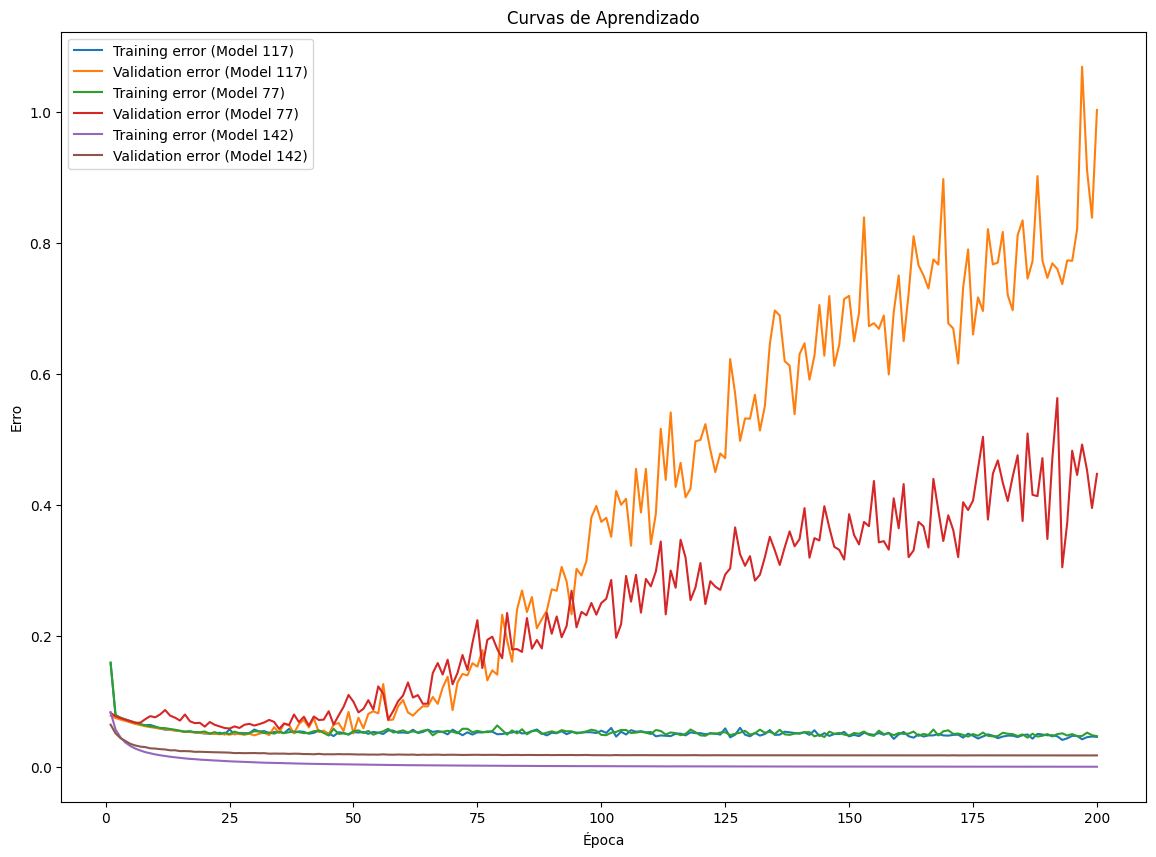

Taxa de aprendizado                                                            0.0001
Nº de neuronios camada escondida                                                  150
Função de ativação 1                                                             relu
Função de ativação 2                                                       leaky_relu
Acurácia                                                                     0.935897
Erro médio                                                                   1.121867
Desvio padrão de erro                                                        4.049226
Erros de treinamento por época      [0.15844990656675856, 0.07878923537751131, 0.0...
Erros de validação por época        [0.07825865243092658, 0.074663217558775, 0.072...
Name: 117, dtype: object


In [70]:
#### Gráficos que comparam a taxa de aprendizado com a acurácia e o erro médio da rede neural

best_models = df.nlargest(3, 'Acurácia')

# Plotar as curvas de aprendizado para os melhores modelos
plt.figure(figsize=(14, 10))
for idx, row in best_models.iterrows():
    train_errors = eval(row['Erros de treinamento por época'])
    val_errors = eval(row['Erros de validação por época'])
    epochs = range(1, len(train_errors) + 1)
    
    plt.plot(epochs, train_errors, label=f'Training error (Model {idx})')
    plt.plot(epochs, val_errors, label=f'Validation error (Model {idx})')

plt.xlabel('Época')
plt.ylabel('Erro')
plt.title('Curvas de Aprendizado')
plt.legend()
plt.show()

print(best_models.iloc[0])


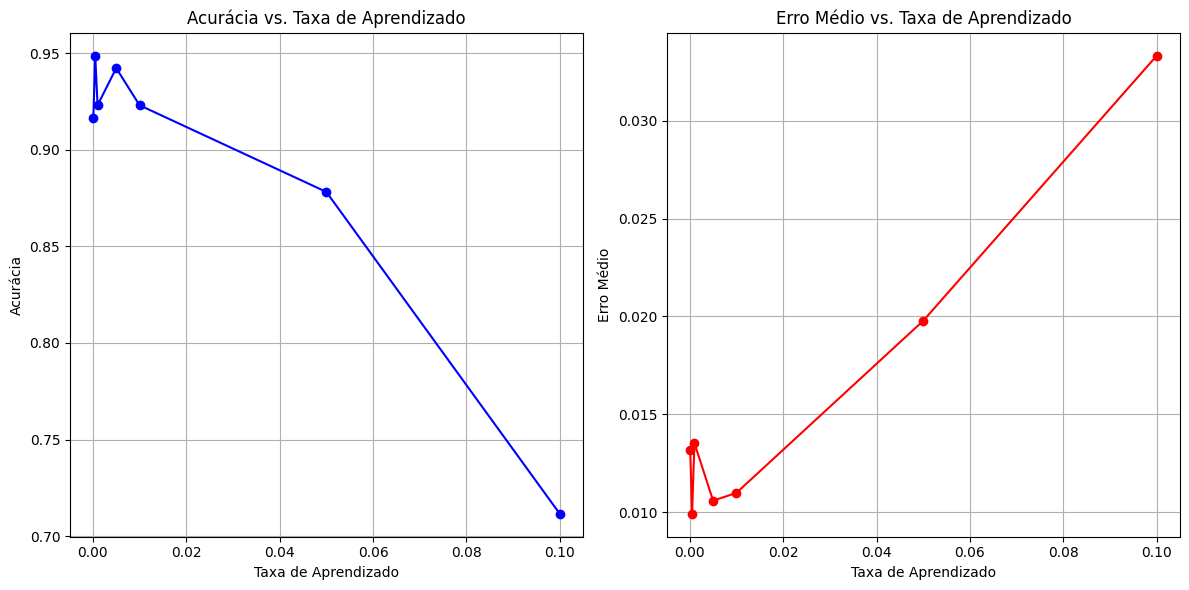

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("csvs/learning_rates.csv")
#Plotting the accuracy vs learning rate
plt.figure(figsize=(12, 6))

#Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(data['Taxa de aprendizado'], data['Acurácia'], marker='o', linestyle='-', color='b')
plt.title('Acurácia vs. Taxa de Aprendizado')
plt.xlabel('Taxa de Aprendizado')
plt.ylabel('Acurácia')
plt.grid(True)

#Plot Mean Error
plt.subplot(1, 2, 2)
plt.plot(data['Taxa de aprendizado'], data['Erro médio'], marker='o', linestyle='-', color='r')
plt.title('Erro Médio vs. Taxa de Aprendizado')
plt.xlabel('Taxa de Aprendizado')
plt.ylabel('Erro Médio')
plt.grid(True)

plt.tight_layout()
plt.show()